<a href="https://colab.research.google.com/github/stephintoto/ICT-ASSIGNMENTS/blob/main/int_asses2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/train_ctrUa4K.csv')

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df_test=pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df_test[num_cols] = df_test[num_cols].fillna(df_test[num_cols].median())

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

In [ ]:
df.drop(columns=['Loan_ID'], inplace=True)
df_test.drop(columns=['Loan_ID'], inplace=True)

In [ ]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
df_test.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


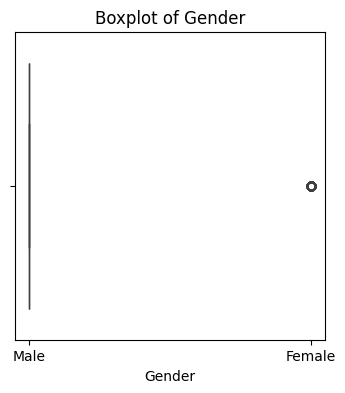

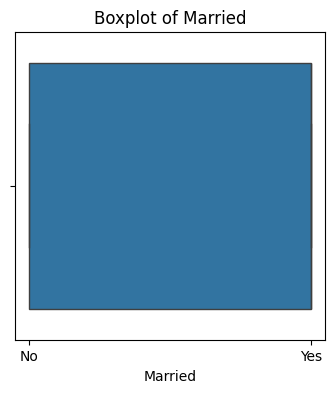

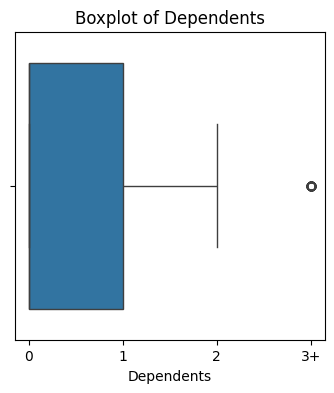

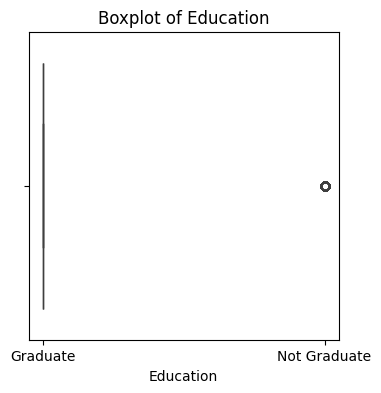

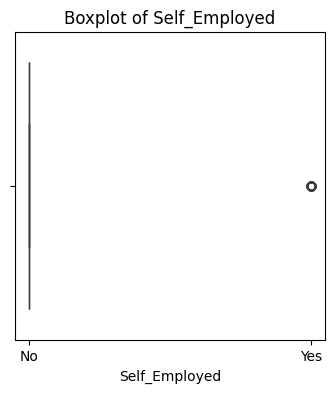

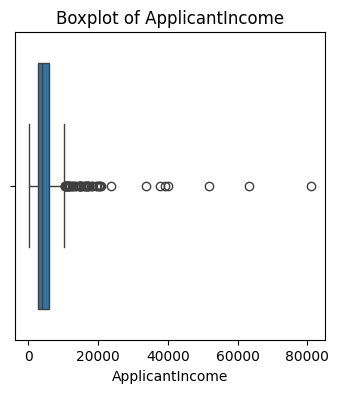

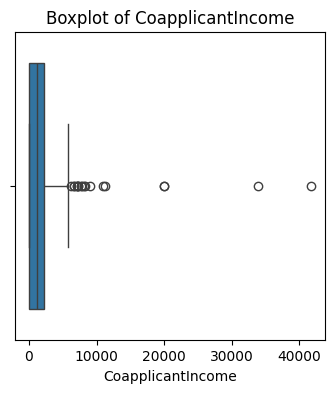

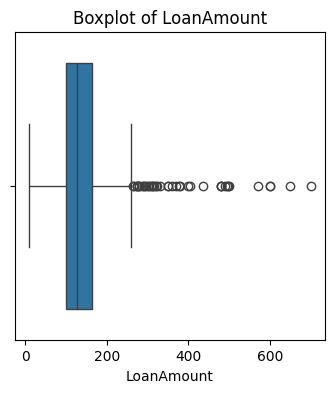

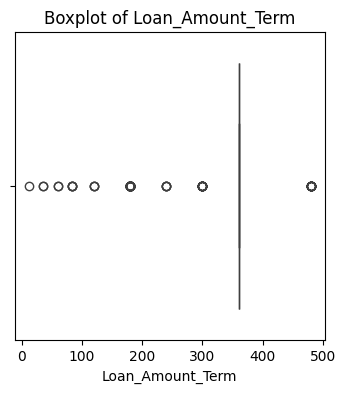

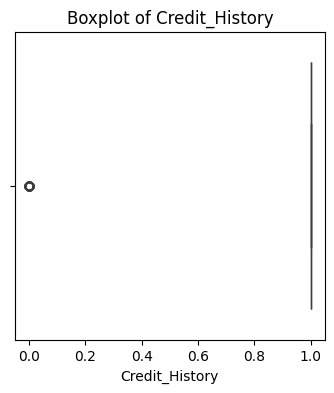

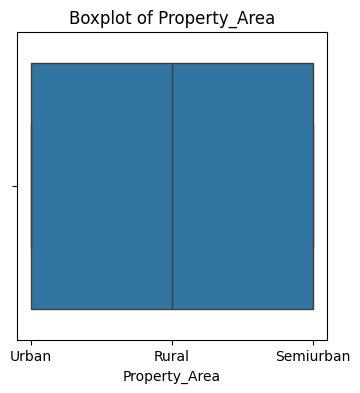

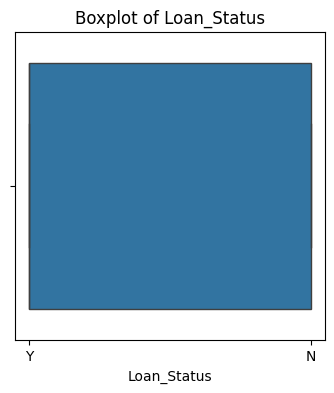

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
  plt.figure(figsize=(4, 4))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
from scipy import stats
import numpy as np

z_threshold = 3

for col in num_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = np.where(z_scores > z_threshold)
    print(f"{col} Outliers: {outliers[0]}")

df = df[(z_scores < z_threshold)]


ApplicantIncome Outliers: [126 155 171 183 185 333 409 443]
CoapplicantIncome Outliers: [  9 177 402 417 581 600]
LoanAmount Outliers: [130 155 171 177 278 308 333 369 432 487 506 523 525 561 604]
Loan_Amount_Term Outliers: [ 14  68  94 133 242 262 313 495 497 546 575 585]
Credit_History Outliers: []


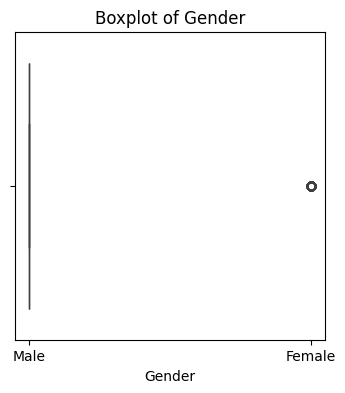

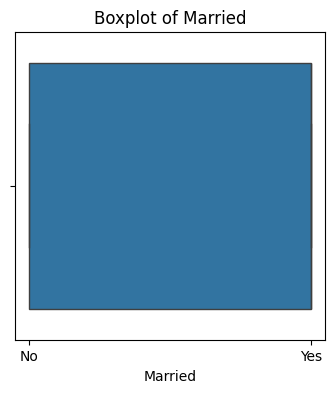

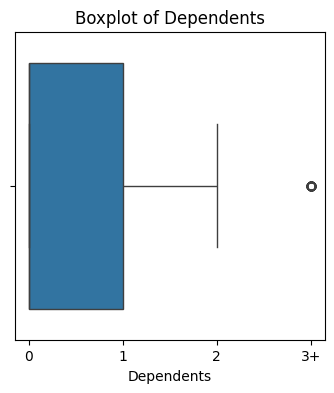

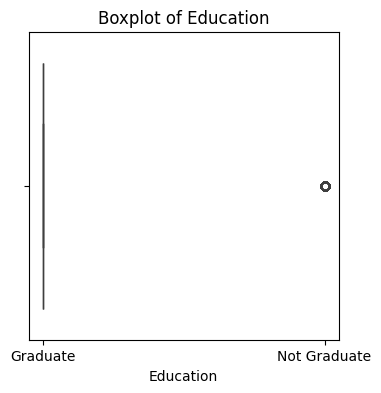

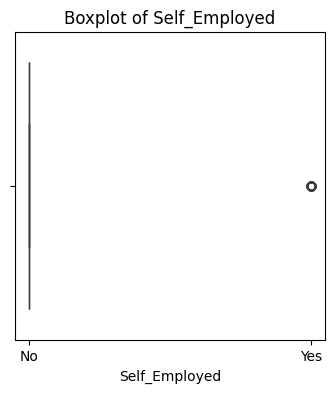

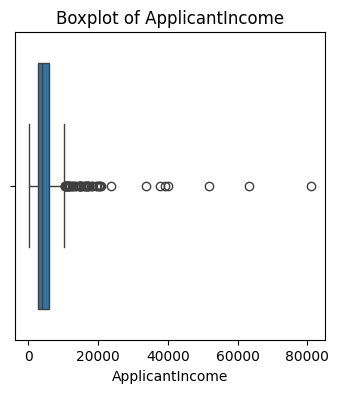

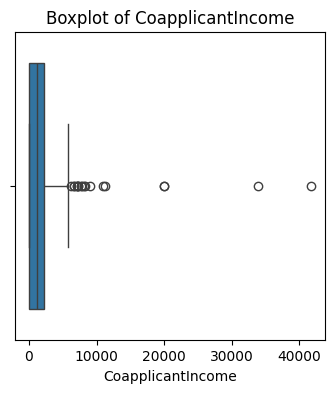

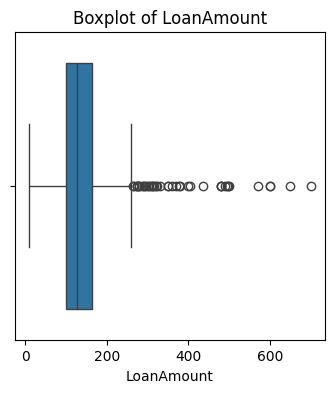

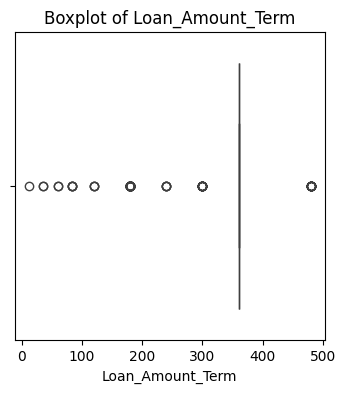

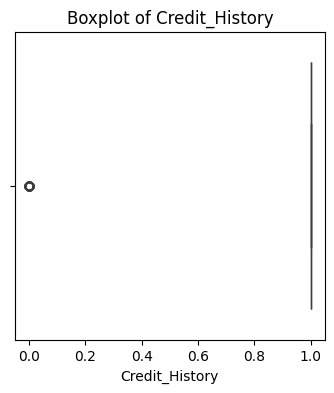

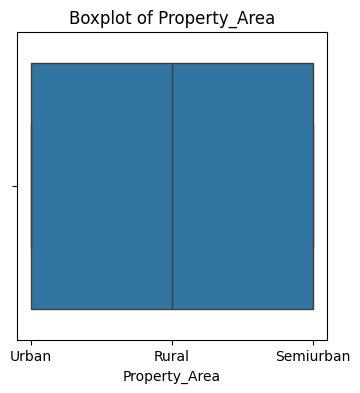

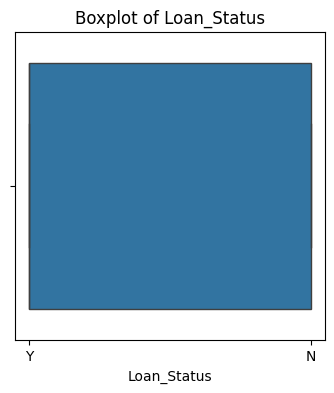

In [ ]:
for column in df.columns:
  plt.figure(figsize=(4, 4))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status','Property_Area','Dependents']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    if col in df_test.columns:
        df_test[col] = le.transform(df_test[col])

In [ ]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2,1
5,1,1,2,0,1,0.002218,0.880600,1.442758,0.273231,0.411733,2,1
6,1,1,0,1,0,-0.503019,-0.035995,-0.603917,0.273231,0.411733,2,1
7,1,1,3,0,0,-0.387850,0.301914,0.145737,0.273231,-2.428760,1,0
8,1,1,2,0,0,-0.228939,-0.032575,0.264730,0.273231,0.411733,2,1
9,1,1,1,0,0,1.218457,3.196713,2.418499,0.273231,0.411733,1,0


In [ ]:
df_dum.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,True
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,False,False
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,False,True
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,False,True
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,True


In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [ ]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn import metrics
y_pred = model.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1 Score:", metrics.f1_score(y, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
y_pred = model.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1 Score:", metrics.f1_score(y, y_pred))

Accuracy: 0.8127035830618893
Precision: 0.7934990439770554
Recall: 0.9834123222748815
F1 Score: 0.8783068783068783


In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, y)

SVC()

In [ ]:
y_pred = model.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1 Score:", metrics.f1_score(y, y_pred))

Accuracy: 0.8192182410423453
Precision: 0.7973231357552581
Recall: 0.9881516587677726
F1 Score: 0.8825396825396826


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [ ]:
y_pred= model.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1 Score:", metrics.f1_score(y, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
model_final=RandomForestClassifier(random_state=42)
model_final.fit(X,y)

RandomForestClassifier(random_state=42)

In [ ]:
test_pred = model_final.predict(df_test)

In [ ]:
test_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_pred= ['Y' if pred == 1 else 'N' for pred in test_pred]

In [ ]:
original_test = pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
submission = pd.DataFrame({
    'Loan_ID': original_test['Loan_ID'],
    'Loan_Status': test_pred
})

In [ ]:
submission.to_csv('loan_predictions.csv', index=False)

In [ ]:
from google.colab import files

files.download('loan_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_decision= DecisionTreeClassifier()
model_decision.fit(X,y)

DecisionTreeClassifier()

In [ ]:
test_prediction = model_decision.predict(df_test)

In [ ]:
test_prediction= ['Y' if pred == 1 else 'N' for pred in test_prediction]

In [ ]:
submission2 = pd.DataFrame({
    'Loan_ID': original_test['Loan_ID'],
    'Loan_Status': test_prediction
})

In [ ]:
submission2.to_csv('loan_predictions2.csv', index=False)

In [ ]:
from google.colab import files

files.download('loan_predictions2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>